# Jet stream and baroclinicity

- compare the jet stream and low pressure location at vortex dissipation (around 19th July)
- u200  (average over a few hours with geopotential contour on top), anomaly 
- ERA5, d01, d02, d03, nudging, RegCM, MPAS 
- check difference plot (e.g. d01 vs. nudging)


- different jet position between d01 and nudging 
- low pressure and/or jet stream in RegCM further north? 
- any differences in EGR or rather that the vortex is moved out of baroclinic zone? 


**Idea** 
- cyclolysis when baroclinicity declines 
- strongest areas of jet stream over strongest area of baroclinicity 
- when cyclone center is not under this area anymore, it begins to decline since jet does not support the generation of vorticity anymore 


In [14]:
import xarray as xr
import numpy as np 
from pathlib import Path
import matplotlib.pyplot as plt
from datetime import datetime
#import quiver
import matplotlib.colors as colors
import cartopy.crs as ccrs
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
import matplotlib.patches as mpatches

In [2]:
# choose times 
t1= datetime(2008,7,19,12)
t2= datetime(2008,7,19,23)
wrft1 = '2008-07-19_12:00:00'
wrft2= '2008-07-19_23:00:00'
timeidx1 = 132 
timeidx2 = timeidx1 +12
icon_t1= 20080719.5
icon_t2 = 20080720.0
idx1 =int(timeidx1/3)
idx2 =int(timeidx2/3)

In [15]:
# choose times 
t1= datetime(2008,7,20,12)
t2= datetime(2008,7,20,23)

wrft1 = '2008-07-20_12:00:00'
wrft2= '2008-07-20_23:00:00'
timeidx1 = 132 + 24
timeidx2 = timeidx1 +12
icon_t1= 20080720.5
icon_t2 = 20080721.0

In [16]:
lev200 = 5
lev500 = 4 

#### Get jet values 

In [17]:
idx1= int(timeidx1 / 3)
idx2 = int(timeidx2/3)

In [18]:
jet = dict()


### ERA5 ###
minlat, maxlat = 20,50
minlon, maxlon = 60,130
era = Path('/gpfs/fs1/collections/rda/data/ds633.0/e5.oper.an.pl/200807/')
files = [era / ('e5.oper.an.pl.128_131_u.ll025uv.2008071900_2008071923.nc'), era / ('e5.oper.an.pl.128_131_u.ll025uv.2008072000_2008072023.nc')]
u200 = xr.open_mfdataset(files).U.sel(level  = 200).sel(time=slice(t1,t2)).mean('time')
jet['ERA5'] = u200.where((u200.latitude > minlat) & (u200.latitude < maxlat) & (u200.longitude > minlon) & (u200.longitude < maxlon), drop = True)

### WRF Simulations ###
wrf_dir = Path('/glade/scratch/kukulies/wrf_processed/')

jet['WRF$_{D1}$'] = xr.open_dataset(wrf_dir / 'WRF4km_d01_u200hpa.nc').U_PL.sel(Time= slice(timeidx1,timeidx2)).mean('Time')
jet['WRF$_{D2}$'] = xr.open_dataset(wrf_dir / 'WRF4km_MCS_L_u200hpa.nc').U_PL.sel(time= slice(wrft1,wrft2)).mean('time')
jet['WRF$_{D3}$'] = xr.open_dataset(wrf_dir / 'WRF4km_5deg_u200hpa.nc').U_PL.sel(time= slice(wrft1,wrft2)).mean('time')
jet['WRF$_{nudging}$'] = xr.open_dataset(wrf_dir / 'WRF4km_spectral_u200hpa.nc').U_PL.sel(time= slice(wrft1,wrft2)).mean('time')



### Other models ### 

# RegCM
reg = xr.open_dataset('/glade/scratch/kukulies/RegCM/ua200_CPTP-MCS-4_ECMWF-ERA5_evaluation_r1i1p1_IITM-RegCM480_v1_hour_20080714-20080724.nc')
jet['RegCM'] = reg.ua200.sel(time= slice(t1,t2)).mean('time')

# MPAS 
mpas = xr.open_dataset('/glade/scratch/kukulies/MPAS/ua200_CPTP-MCS-4_ECMWF-ERA5_evaluation_r1i1p1_PNNL-MPAS7.0P_v1_3hour_20080714-20080724.nc')
jet['MPAS'] = mpas.ua200[idx1:idx2].mean('time')

# CCLM
cclm = xr.open_dataset('/glade/scratch/kukulies/CCLM/uv_200hPa_CPTP-MCS-2.2_ECMWF-ERA5_evaluation_r1i1p1_UIBK-CCLM5.0n1P_v1_3h_20080714-20080724.nc')
jet['CCLM'] = cclm.U.sel(time= slice(t1,t2)).mean('time').squeeze()

# ICON
icon = xr.open_dataset('/glade/scratch/kukulies/ICON/ua200_CPTP-MCS-3_ECMWF-ERA5_evaluation_r1i1p1_IAP-CAS-ICON2.6.1P_v1_hour_20080714-20080724.nc')
jet['ICON2.6.1'] = icon.u.sel(time= slice(icon_t1,icon_t2)).mean('time').squeeze()

# ICON
icon = xr.open_dataset('/glade/scratch/kukulies/ICON/ua200_CPTP-MCS-4_ECMWF-ERA5_evaluation_r1i1p1_GUF-ICON2.6.3_v1_hour_20080714-20080724.nc')
jet['ICON2.6.3'] = icon.ua200.sel(time= slice(t1,t2)).mean('time').squeeze()


### coordinates ### 
lons= dict()
lats = dict()
lats['RegCM'] = jet['RegCM'].lat.values
lons['RegCM'] = jet['RegCM'].lon.values
lats['ICON2.6.1'] = jet['ICON2.6.1'].lat.values
lons['ICON2.6.1'] = jet['ICON2.6.1'].lon.values
lats['ICON2.6.3'] = jet['ICON2.6.3'].lat.values
lons['ICON2.6.3'] = jet['ICON2.6.3'].lon.values
lats['MPAS'] = jet['MPAS'].lat.values
lons['MPAS'] = jet['MPAS'].lon.values
lats['CCLM'] = jet['CCLM'].slatu.values
lons['CCLM'] = jet['CCLM'].slonu.values
lats['ERA5'] = jet['ERA5'].latitude.values
lons['ERA5'] = jet['ERA5'].longitude.values

wrf1= xr.open_dataset('/glade/campaign/mmm/c3we/prein/CPTP/data/4km_MCS/wrfout/wrfout_d01_2008-07-21_01:00:00')
wrf2 = xr.open_dataset('/glade/campaign/mmm/c3we/prein/CPTP/data/4km_MCS_L/wrfout/wrfoutPL_d01.2008-07-16_01:00:00.nc')
wrf3 = xr.open_dataset('/glade/u/home/kukulies/WRF_simulations/4km_5deg/geo_em.d01.nc')
lats['WRF$_{D1}$'] = wrf1.XLAT.values[0]
lons['WRF$_{D1}$'] = wrf1.XLONG.values[0]
lats['WRF$_{D2}$'] = wrf2.XLAT.values[0]
lons['WRF$_{D2}$'] = wrf2.XLONG.values[0]
lats['WRF$_{D3}$'] = wrf3.XLAT_M.values[0]
lons['WRF$_{D3}$'] = wrf3.XLONG_M.values[0]
lats['WRF$_{nudging}$'] = wrf1.XLAT.values[0]
lons['WRF$_{nudging}$'] = wrf1.XLONG.values[0]

#### Get geopotential values 

In [19]:
### ERA geopotential mean ###
files = [era / ('e5.oper.an.pl.128_129_z.ll025sc.2008071400_2008071423.nc'), 
         era / ('e5.oper.an.pl.128_129_z.ll025sc.2008071500_2008071523.nc'),
         era / ('e5.oper.an.pl.128_129_z.ll025sc.2008071600_2008071623.nc'),
         era / ('e5.oper.an.pl.128_129_z.ll025sc.2008071700_2008071723.nc'),
         era / ('e5.oper.an.pl.128_129_z.ll025sc.2008071800_2008071823.nc'),
         era / ('e5.oper.an.pl.128_129_z.ll025sc.2008071900_2008071923.nc'),
         era / ('e5.oper.an.pl.128_129_z.ll025sc.2008072000_2008072023.nc'),
         era / ('e5.oper.an.pl.128_129_z.ll025sc.2008072100_2008072123.nc'),
         era / ('e5.oper.an.pl.128_129_z.ll025sc.2008072200_2008072223.nc'),
         era / ('e5.oper.an.pl.128_129_z.ll025sc.2008072300_2008072323.nc'),
         era / ('e5.oper.an.pl.128_129_z.ll025sc.2008072400_2008072423.nc')]
geop_era_clim = 0 
for file in files:
    z500 = xr.open_dataset(file).Z / 9.81 
    z500 = z500.sel(level  = 500).mean('time')
    minlat, maxlat = 20, 50
    minlon, maxlon = 60,130
    geop_era_clim += z500.where((z500.latitude > minlat) & (z500.latitude < maxlat) & (z500.longitude > minlon) & (z500.longitude < maxlon), drop = True).data
geop_era_clim = geop_era_clim / len(files)

In [20]:
# add geopotential anomaly contour to verify presence and location of low pressure system with regard to jet 

geop = dict()
### ERA5 ###
era = Path('/gpfs/fs1/collections/rda/data/ds633.0/e5.oper.an.pl/200807/')
files = [era / ('e5.oper.an.pl.128_129_z.ll025sc.2008071900_2008071923.nc'), era / ('e5.oper.an.pl.128_129_z.ll025sc.2008072000_2008072023.nc')]
z500 = xr.open_mfdataset(files).Z / 9.81 
z500 = z500.sel(level  = 500).sel(time=slice(t1,t2)).mean('time')
minlat, maxlat = 20, 50
minlon, maxlon = 60,130
geop['ERA5'] = z500.where((z500.latitude > minlat) & (z500.latitude < maxlat) & (z500.longitude > minlon) & (z500.longitude < maxlon), drop = True)



##### Get 500 hPa WRF simulations #####
wrf_dir = Path('/glade/scratch/kukulies/wrf_processed/')

geop['WRF$_{D1}$'] = xr.open_dataset(wrf_dir / 'WRF4km_d01_z500hpa.nc').GHT_PL.sel(Time= slice(timeidx1,timeidx2)).mean('Time')
geop['WRF$_{D2}$'] = xr.open_dataset(wrf_dir / 'WRF4km_MCS_L_z500hpa.nc').GHT_PL.sel(time= slice(wrft1,wrft2)).mean('time')
geop['WRF$_{D3}$'] = xr.open_dataset(wrf_dir / 'WRF4km_5deg_z500hpa.nc').GHT_PL.sel(time= slice(wrft1,wrft2)).mean('time')
geop['WRF$_{nudging}$'] = xr.open_dataset(wrf_dir / 'WRF4km_spectral_z500hpa.nc').GHT_PL.sel(time= slice(wrft1,wrft2)).mean('time')


### get anomalies ### 
geop['WRF$_{D1}$'] -= xr.open_dataset(wrf_dir / 'WRF4km_d01_z500hpa.nc').GHT_PL.mean('Time')
geop['WRF$_{D2}$'] -= xr.open_dataset(wrf_dir / 'WRF4km_MCS_L_z500hpa.nc').GHT_PL.mean('time')
geop['WRF$_{D3}$'] -= xr.open_dataset(wrf_dir / 'WRF4km_5deg_z500hpa.nc').GHT_PL.mean('time')
geop['WRF$_{nudging}$'] -= xr.open_dataset(wrf_dir / 'WRF4km_spectral_z500hpa.nc').GHT_PL.mean('time')



### Simulations of other models  ###
reg = xr.open_dataset('/glade/scratch/kukulies/RegCM/zg500_CPTP-MCS-4_ECMWF-ERA5_evaluation_r1i1p1_IITM-RegCM480_v1_hour_20080714-20080724.nc')
geop['RegCM'] = reg.zg500.sel(time= slice(t1,t2)).mean('time')

mpas = xr.open_dataset('/glade/scratch/kukulies/MPAS/zg500_CPTP-MCS-4_ECMWF-ERA5_evaluation_r1i1p1_PNNL-MPAS7.0P_v1_3hour_20080714-20080724.nc')
geop['MPAS'] = mpas.zg500[idx1:idx2].mean('time')

cclm = xr.open_dataset('/glade/scratch/kukulies/CCLM/geopt_CPTP-MCS-2.2_ECMWF-ERA5_evaluation_r1i1p1_UIBK-CCLM5.0n1P_v1_3h_20080714-20080724_500hPa.nc')
geop['CCLM'] = cclm.FI[52:56].mean('time') / 9.81

icon1 = xr.open_dataset('/glade/scratch/kukulies/ICON/zg500_CPTP-MCS-3_ECMWF-ERA5_evaluation_r1i1p1_IAP-CAS-ICON2.6.1P_v1_hour_20080714-20080724.nc')
geop['ICON2.6.1'] = icon1.geopot.sel(time= slice(icon_t1,icon_t2)).mean('time') / 9.81 

icon3 = xr.open_dataset('/glade/scratch/kukulies/ICON/zg500_CPTP-MCS-4_ECMWF-ERA5_evaluation_r1i1p1_GUF-ICON2.6.3_v1_hour_20080714-20080724.nc')
geop['ICON2.6.3'] = icon3.zg500.sel(time= slice(t1,t2)).mean('time') / 9.81 

### get anomalies ### 
geop['RegCM'] -= reg.zg500.mean('time')
geop['MPAS'] -= mpas.zg500.mean('time')
geop['ICON2.6.1'] -= icon1.geopot.mean('time') / 9.81
geop['ICON2.6.3'] -= icon3.zg500.mean('time') / 9.81
geop['CCLM'] -= cclm.FI.mean('time') / 9.81 
geop['ERA5'] -= geop_era_clim

# squeezin 
geop['ICON2.6.1'] = geop['ICON2.6.1'].squeeze()
geop['ICON2.6.3'] = geop['ICON2.6.3'].squeeze()
geop['CCLM'] = geop['CCLM'].squeeze()

### Comparison in jet position and intensity at vortex dissipation

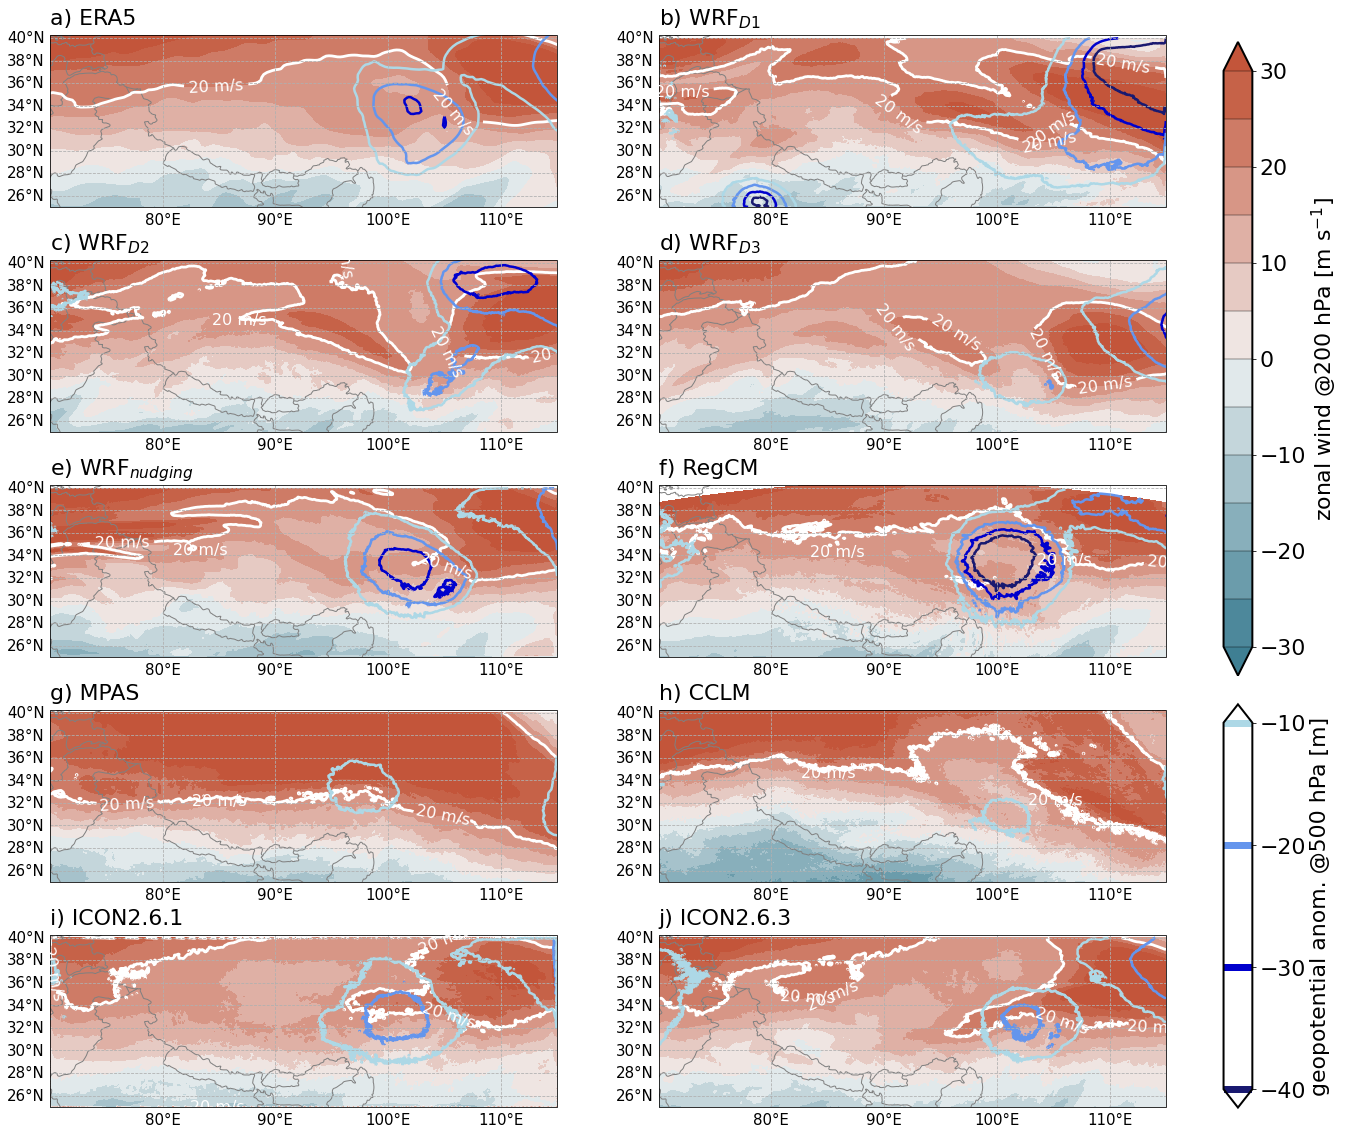

In [21]:
### plot ### 
import seaborn as sns 
fig = plt.figure(figsize=(20,20))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.color_palette("Spectral", as_cmap=True)

extent = [70,115,25,38]
fs = 22 
letters = ['a', 'b',  'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']

for idx in np.arange(len(jet.keys())):
    key = list(jet.keys())[idx]
    ax = plt.subplot(5, 2, idx+1, projection=ccrs.PlateCarree())
    ax.set_extent(extent)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, color = 'gray')
    m= ax.contourf(lons[key], lats[key], jet[key], levels = np.arange(-30,35,5), extend = 'both', cmap = cmap)
    J = ax.contour(lons[key], lats[key], jet[key], levels = [20], cmap = 'Greys', linewidths = [2.8])
    gl= ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linestyle= '--')
    ax.set_title(letters[idx] +') '+key, fontsize =fs, loc = 'left')
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'size': 15, 'color': 'black'}
    gl.ylabel_style = {'size': 15, 'color': 'black'}
    try:
        CS=ax.contour(lons[key], lats[key], geop[key], levels = [-40, -30, -20, -10], colors= ['midnightblue', 'mediumblue', 'cornflowerblue', 'lightblue'], linewidths = [2.5], extend = 'both')
        #ax.clabel(CS, CS.levels, inline=True,fontsize=10, fmt =  '%1.0f')
    except:
        continue
        
    ax.clabel(J, J.levels, inline=True,fontsize=16, fmt =  '%1.0f m/s')
    ax.clabel(J, J.levels, inline=True,fontsize=16, fmt =  '%1.0f m/s', manual=[(105,32)] ) 
    ax.clabel(J, J.levels, inline=True,fontsize=16, fmt =  '%1.0f m/s', manual=[(85,28)] ) 
        
# colorbar for wind 
cb_ax2 = fig.add_axes([0.94, 0.43,0.02, 0.44])
cbar = fig.colorbar(m, cax=cb_ax2,   drawedges=True)
cbar.outline.set_edgecolor('black')
cbar.outline.set_linewidth(2)
cbar.ax.tick_params(labelsize=fs)
cbar.set_label(r'zonal wind @200 hPa [m s$^{-1}$]', size=22)

# colorbar for geopotential anomaly 
# make a colorbar for the contour lines
cb_ax1 = fig.add_axes([0.94, 0.13,0.02, 0.28])
CB = fig.colorbar(CS, cax=cb_ax1, shrink=0.8, extend = 'both')
CB.outline.set_edgecolor('black')
CB.outline.set_linewidth(2)
CB.ax.tick_params(labelsize=fs)
CB.set_label(r'geopotential anom. @500 hPa [m]', size=22)
CB.ax.get_children()[1].set_linewidth(7.0)

plt.savefig('plots/jet_comparison_07-20.png', bbox_inches = 'tight', facecolor = 'white', transparent = False)
plt.show()

In [ ]:
##### Get 500 hPa WRF simulations from original output - takes time! #####

wrfdata= Path('/glade/campaign/mmm/c3we/prein/CPTP/data/4km_MCS_L/wrfout/')
files= list(wrfdata.glob('*PL*07-*nc'))
data = xr.open_dataset(files[0])
wrf_data_l = data.GHT_PL.sel(num_press_levels_stag = lev500)
geop['WRF$_{D2}$'] = wrf_data_l.mean('Time')
# [11:-1]

wrfdata= Path('/glade/campaign/mmm/c3we/prein/CPTP/data/4km_MCS/wrfout/')
files= list(wrfdata.glob('*PL*07-*nc'))
data = xr.open_dataset(files[0])
files = files
for file in files[1:]:
    data = xr.concat([data, xr.open_dataset(file)], dim = 'Time ')

wrf_data = data.GHT_PL.sel(num_press_levels_stag = lev500)
geop['WRF$_{D1}$'] = wrf_data.mean('Time')

# additional experiments 
wrf_dir = Path('/glade/scratch/kukulies/wrf_processed/')
geop['WRF$_{D3}$'] = xr.open_dataset(wrf_dir / 'WRF4km_5deg_z500hpa.nc').GHT_PL.sel(time= slice(wrft1,wrft2)).mean('time')
geop['WRF$_{nudging}$'] = xr.open_dataset(wrf_dir / 'WRF4km_spectral_z500hpa.nc').GHT_PL.sel(time= slice(wrft1,wrft2)).mean('time')
### get anomalies ### 
geop['WRF$_{D3}$'] -= xr.open_dataset(wrf_dir / 'WRF4km_5deg_z500hpa.nc').GHT_PL.mean('time')
geop['WRF$_{nudging}$'] -= xr.open_dataset(wrf_dir / 'WRF4km_spectral_z500hpa.nc').GHT_PL.mean('time')

### get anomalies by reading in data for entire simulation period for WRFD11 and WRFD2 ### 
WRFD1_clim = wrf_data.mean('Time')
WRFD2_clim = wrf_data_l.mean('Time')

geop['WRF$_{D1}$']-= WRFD1_clim 
geop['WRF$_{D2}$'] -= WRFd2_clim


## Get 200 hPa WRF simulations large from original model output ##########
wrfdata= Path('/glade/campaign/mmm/c3we/prein/CPTP/data/4km_MCS_L/wrfout/')
files= list(wrfdata.glob('*PL*07-*nc'))

data = xr.open_dataset(files[0])
lev = np.where(data.P_PL.where(data.P_PL == 200*100) > 0)[0][0]
wrf_data_l = data.U_PL.sel(num_press_levels_stag = lev200)
jet['WRF$_{D2}$'] = wrf_data_l.sel(Time= slice(timeidx1,timeidx2)).mean('Time')
#[11:-1]

wrfdata= Path('/glade/campaign/mmm/c3we/prein/CPTP/data/4km_MCS/wrfout/')
files= list(wrfdata.glob('*PL*07-*nc'))
data = xr.open_dataset(files[0])
files = files
for file in files[1:]:
    data = xr.concat([data, xr.open_dataset(file)], dim = 'Time ')
    
lev = np.where(data.P_PL.where(data.P_PL == 200*100) > 0)[0][0]
wrf_data = data.U_PL.sel(num_press_levels_stag = lev200)
jet['WRF$_{D1}$'] = wrf_data.sel(Time= slice(timeidx1,timeidx2)).mean('Time')



#### Get mean jets and domain extends 

In [8]:
wrf1= xr.open_dataset('/glade/campaign/mmm/c3we/prein/CPTP/data/4km_MCS/wrfout/wrfout_d01_2008-07-21_01:00:00')
wrf_lats_small1 = wrf1.XLAT.values[0][:,0]
wrf_lons_small1 = wrf1.XLONG.values[0][:,0]
wrf_lats_small2 = wrf1.XLAT.values[0][-1,:]
wrf_lons_small2 = wrf1.XLONG.values[0][-1,:]
wrf_lats_small3 = wrf1.XLAT.values[0][0,:]
wrf_lons_small3 = wrf1.XLONG.values[0][0,:]
wrf_lats_small4 = wrf1.XLAT.values[0][:,-1]
wrf_lons_small4 = wrf1.XLONG.values[0][:,-1]
                                       
                                       
wrf2 = xr.open_dataset('/glade/campaign/mmm/c3we/prein/CPTP/data/4km_MCS_L/wrfout/wrfoutPL_d01.2008-07-16_01:00:00.nc')

wrf_lats_large1 = wrf2.XLAT.values[0][:,0]
wrf_lons_large1 = wrf2.XLONG.values[0][:,0]
wrf_lats_large2 = wrf2.XLAT.values[0][-1,:]
wrf_lons_large2 = wrf2.XLONG.values[0][-1,:]
wrf_lats_large3 = wrf2.XLAT.values[0][0,:]
wrf_lons_large3 = wrf2.XLONG.values[0][0,:]
wrf_lats_large4 = wrf2.XLAT.values[0][:,-1]
wrf_lons_large4 = wrf2.XLONG.values[0][:,-1]


wrf3 = xr.open_dataset('/glade/u/home/kukulies/WRF_simulations/4km_5deg/geo_em.d01.nc')
wrf_lats_5deg1 = wrf3.XLAT_M.values[0][:,0]
wrf_lons_5deg1 = wrf3.XLONG_M.values[0][:,0]
wrf_lats_5deg2 = wrf3.XLAT_M.values[0][-1,:]
wrf_lons_5deg2 = wrf3.XLONG_M.values[0][-1,:]
wrf_lats_5deg3 = wrf3.XLAT_M.values[0][0,:]
wrf_lons_5deg3 = wrf3.XLONG_M.values[0][0,:]
wrf_lats_5deg4 = wrf3.XLAT_M.values[0][:,-1]
wrf_lons_5deg4 = wrf3.XLONG_M.values[0][:,-1]


In [34]:
### get extents for all three domains (using the wrf package) 
import wrf
from netCDF4 import Dataset 

infile = '/glade/campaign/mmm/c3we/prein/CPTP/data/4km_MCS/wrfout/wrfout_d01_2008-07-21_01:00:00'
p = wrf.getvar(Dataset(infile, 'r'), 'RAINNC')
cart_proj = wrf.get_cartopy(p)
xlim_d01 = wrf.cartopy_xlim(p)
ylim_d01= wrf.cartopy_ylim(p)

infile = '/glade/campaign/mmm/c3we/prein/CPTP/data/4km_MCS_L/wrfout/wrfout_d01_2008-07-24_01:00:00'
p = wrf.getvar(Dataset(infile, 'r'), 'RAINNC')
cart_proj = wrf.get_cartopy(p)
xlim_d02 = wrf.cartopy_xlim(p)
ylim_d02= wrf.cartopy_ylim(p)

infile = '/glade/scratch/kukulies/CPTP/4km_5deg/wrfout/wrfout_d01_2008-07-23_01:00:00'
p = wrf.getvar(Dataset(infile, 'r'), 'RAINNC')
cart_proj = wrf.get_cartopy(p)
xlim_d03 = wrf.cartopy_xlim(p)
ylim_d03= wrf.cartopy_ylim(p)
dem_d03 = wrf.getvar(Dataset(infile, 'r'), 'ter')
lats_d03 = wrf.getvar(Dataset(infile, 'r'), 'lat')
lons_d03 = wrf.getvar(Dataset(infile, 'r'), 'lon')


ImportError: /glade/u/home/kukulies/.local/lib/python3.7/site-packages/wrf/_wrffortran.cpython-37m-x86_64-linux-gnu.so: undefined symbol: __kmpc_ok_to_fork

In [10]:
era = xr.open_dataset('/glade/scratch/kukulies/kukulies032022/data/ERA5/mean_jet_200807.nc')
minlat, maxlat = 10, 60
minlon, maxlon = 0,170
era = era.where((u200.latitude > minlat) & (u200.latitude < maxlat) & (u200.longitude > minlon) & (u200.longitude < maxlon), drop = True)
#jet_era_clim= era.where( (mean_jet.latitude >= 10)  & (mean_jet.latitude<= 60), drop = True ).U

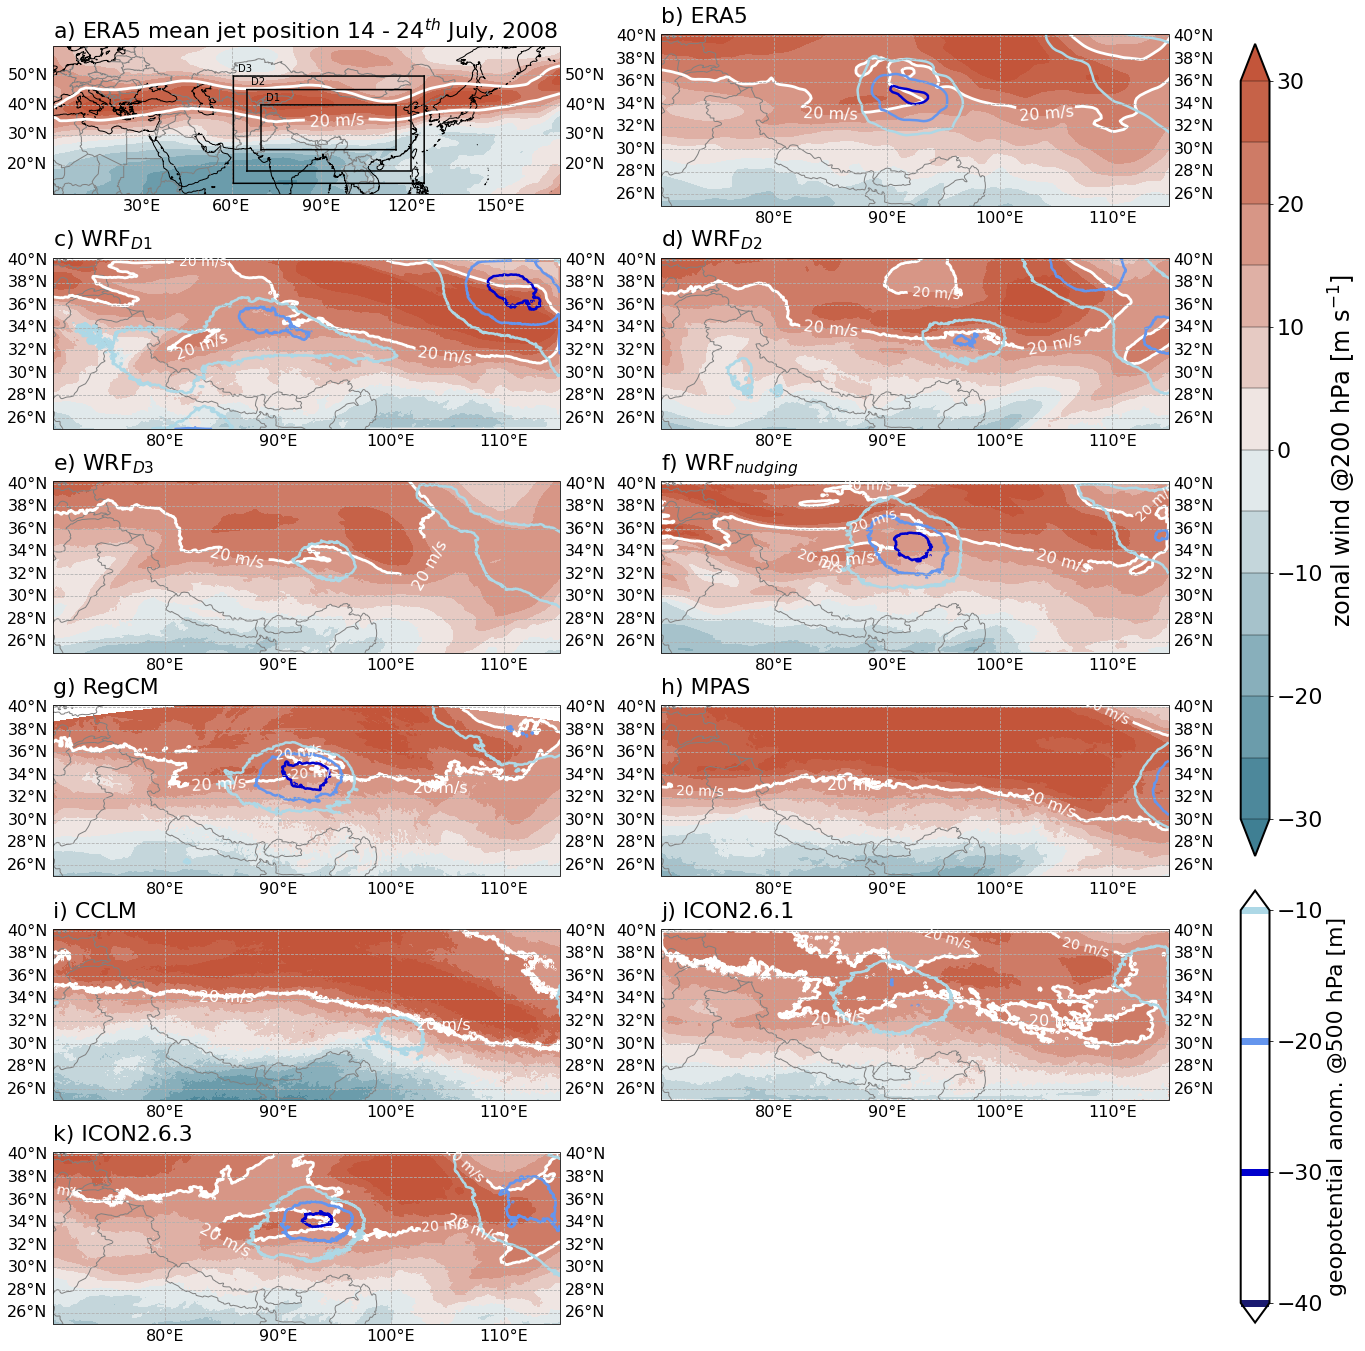

In [13]:
### plot ### 
import matplotlib as mpl
import matplotlib.patches as mpatches
import seaborn as sns 

fig = plt.figure(figsize=(20,24))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
extent = [70,115,25,38]
fs = 22 
lw = 1.5

size = 14
color1= 'black'
color2 = 'black'
color3 = 'black'

# mean jet position in ERA5 with domains 
subplots = 6
ax = plt.subplot2grid(shape=(subplots, 2), loc=(0, 0), colspan=1, projection= ccrs.PlateCarree())
ax.contourf(era.longitude, era.latitude, jet_era_clim, levels = np.arange(-30,35,5), extend = 'both', cmap = cmap, transform=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, color = 'gray')
J = ax.contour(era.longitude, era.latitude, jet_era_clim, levels = [20], cmap = 'Greys', linewidths = [2.8], transform=ccrs.PlateCarree())
ax.set_title('a) ERA5 mean jet position 14 - 24$^{th}$ July, 2008', fontsize =fs, loc = 'left')
gl= ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linestyle= '--')
gl.top_labels = False
gl.xlabel_style = {'size': 16, 'color': 'black'}
gl.ylabel_style = {'size': 16, 'color': 'black'}
ax.clabel(J, J.levels, inline=True,fontsize=16, fmt =  '%1.0f m/s', manual=[(105,-33)] ) 

#ax.add_patch(mpl.patches.Rectangle((xlim_d01[0], ylim_d01[0]), xlim_d01[1]-xlim_d01[0], ylim_d01[1]-ylim_d01[0],fill=None, edgecolor = color1,lw=lw, zorder=10))
#ax.add_patch(mpl.patches.Rectangle((xlim_d02[0], ylim_d02[0]), xlim_d02[1]-xlim_d02[0], ylim_d02[1]-ylim_d02[0],fill=None, edgecolor = color2,lw=lw, zorder=10))
#ax.add_patch(mpl.patches.Rectangle((xlim_d03[0], ylim_d03[0]), xlim_d03[1]-xlim_d03[0], ylim_d03[1]-ylim_d03[0],fill=None, edgecolor=color3, lw=lw, zorder=10))
#ax.text(xlim_d01[0]+(xlim_d01[1]-xlim_d01[0])*0.01, ylim_d01[0]+(ylim_d01[1]-ylim_d01[0])*1.1, 'D1',size=size, color=color1, zorder=12)
#ax.text(xlim_d02[0]+(xlim_d02[1]-xlim_d02[0])*0.01, ylim_d02[0]+(ylim_d02[1]-ylim_d02[0])*1.1, 'D2',size=size, color=color2, zorder=12)
#ax.text(xlim_d03[0]+(xlim_d03[1]-xlim_d03[0])*0.01, ylim_d03[0]+(ylim_d03[1]-ylim_d03[0])*1.1, 'D3',size=size, color=color3, zorder=12)
######################################################################

# small domain 
color = 'black'
ax.text(wrf_lons_small1[0] + 1.5, wrf_lats_small2[0] + 1.5, s= 'D1', color = color )
ax.plot(wrf_lons_small1, wrf_lats_small1, lw = lw , color = color)
ax.plot(wrf_lons_small2, wrf_lats_small2, lw = lw , color = color)
ax.plot(wrf_lons_small3, wrf_lats_small3, lw = lw , color = color)
ax.plot(wrf_lons_small4, wrf_lats_small4, lw = lw , color = color)

# large domain 
ax.text(wrf_lons_large1[0] + 1.5, wrf_lats_large2[0] + 1.5, s= 'D2', color = color)
ax.plot(wrf_lons_large1, wrf_lats_large1, lw = lw , color = color)
ax.plot(wrf_lons_large2, wrf_lats_large2, lw = lw , color = color)
ax.plot(wrf_lons_large3, wrf_lats_large3, lw = lw , color = color)
ax.plot(wrf_lons_large4, wrf_lats_large4, lw = lw , color = color)

# large-large domain 
ax.text(wrf_lons_5deg1[0] + 1.5, wrf_lats_5deg2[0] + 1.5, s= 'D3', color = color )
ax.plot(wrf_lons_5deg1, wrf_lats_5deg1, lw = lw , color =color)
ax.plot(wrf_lons_5deg2, wrf_lats_5deg2, lw = lw , color = color)
ax.plot(wrf_lons_5deg3, wrf_lats_5deg3, lw = lw , color = color)
ax.plot(wrf_lons_5deg4, wrf_lats_5deg4, lw = lw , color = color)

######################################################################
axes =  dict()
axes['1'] = plt.subplot2grid(shape=(subplots, 2), loc=(0, 1), colspan=1, projection=ccrs.PlateCarree())
axes['2'] = plt.subplot2grid(shape=(subplots, 2), loc=(1, 0), colspan=1, projection=ccrs.PlateCarree())
axes['3']  = plt.subplot2grid(shape=(subplots, 2), loc=(1, 1), colspan=1, projection=ccrs.PlateCarree())
axes['4']  = plt.subplot2grid(shape=(subplots, 2), loc=(2, 0), colspan=1, projection=ccrs.PlateCarree())
axes['5']  = plt.subplot2grid(shape=(subplots, 2), loc=(2, 1), colspan=1, projection=ccrs.PlateCarree())
axes['6']  = plt.subplot2grid(shape=(subplots, 2), loc=(3, 0), colspan=1, projection=ccrs.PlateCarree())

axes['7']  = plt.subplot2grid(shape=(subplots, 2), loc=(3, 1), colspan=1, projection=ccrs.PlateCarree())
axes['8']  = plt.subplot2grid(shape=(subplots, 2), loc=(4, 0), colspan=1, projection=ccrs.PlateCarree())
axes['9']  = plt.subplot2grid(shape=(subplots, 2), loc=(4, 1), colspan=1, projection=ccrs.PlateCarree())
axes['10']  = plt.subplot2grid(shape=(subplots, 2), loc=(5, 0), colspan=1, projection=ccrs.PlateCarree())

letters = ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k','l' ]

                              
# subplots with jet position and geopotential anomaly on 19th july 
for idx in np.arange(len(jet.keys())):
    key = list(jet.keys())[idx]
    ax = axes[str(idx+1)]
    ax.set_extent(extent)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, color = 'gray')
    m= ax.contourf(lons[key], lats[key], jet[key], levels = np.arange(-30,35,5), extend = 'both', cmap = cmap)
    J = ax.contour(lons[key], lats[key], jet[key], levels = [20], cmap = 'Greys', linewidths = [2.8])
    ax.clabel(J, J.levels, inline=True,fontsize=14, fmt =  '%1.0f m/s')
    ax.set_title(letters[idx] +') '+key, fontsize =fs, loc = 'left')
    gl= ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linestyle= '--')
    gl.top_labels = False
    gl.xlabel_style = {'size': 16, 'color': 'black'}
    gl.ylabel_style = {'size': 16, 'color': 'black'}
    try:
        CS=ax.contour(lons[key], lats[key], geop[key], levels = [-40, -30, -20, -10], colors= ['midnightblue', 'mediumblue', 'cornflowerblue', 'lightblue'], linewidths = [2.5], extend = 'both')
        #ax.clabel(CS, CS.levels, inline=True,fontsize=10, fmt =  '%1.0f')
    except:
        continue
    ax.clabel(J, J.levels, inline=True,fontsize=16, fmt =  '%1.0f m/s', manual=[(105,32)] ) 
    ax.clabel(J, J.levels, inline=True,fontsize=16, fmt =  '%1.0f m/s', manual=[(85,28)] ) 
    
# colorbar for wind 
cb_ax2 = fig.add_axes([0.95, 0.4,0.02, 0.47])
cbar = fig.colorbar(m, cax=cb_ax2,   drawedges=True)
cbar.outline.set_edgecolor('black')
cbar.outline.set_linewidth(2)
cbar.ax.tick_params(labelsize=fs)
cbar.set_label(r'zonal wind @200 hPa [m s$^{-1}$]', size=24)

# colorbar for geopotential anomaly 
# make a colorbar for the contour lines
cb_ax1 = fig.add_axes([0.95, 0.13,0.02, 0.25])
CB = fig.colorbar(CS, cax=cb_ax1, shrink=0.8, extend = 'both')
CB.outline.set_edgecolor('black')
CB.outline.set_linewidth(2)
CB.ax.tick_params(labelsize=fs)
CB.set_label(r'geopotential anom. @500 hPa [m]', size=22)
CB.ax.get_children()[1].set_linewidth(7.0)

plt.savefig('plots/jet_comparison_07-19.png', bbox_inches = 'tight', facecolor = 'white', transparent = False)
plt.show()

### Jet stream anomalies

In [9]:
### ERA jet mean ### 
era = Path('/gpfs/fs1/collections/rda/data/ds633.0/e5.oper.an.pl/200807/')
minlat, maxlat = 10, 60
minlon, maxlon = 0,170
files = [era / ('e5.oper.an.pl.128_131_u.ll025uv.2008071400_2008071423.nc'), 
         era / ('e5.oper.an.pl.128_131_u.ll025uv.2008071500_2008071523.nc'),
         era / ('e5.oper.an.pl.128_131_u.ll025uv.2008071600_2008071623.nc'),
         era / ('e5.oper.an.pl.128_131_u.ll025uv.2008071700_2008071723.nc'),
         era / ('e5.oper.an.pl.128_131_u.ll025uv.2008071800_2008071823.nc'),
         era / ('e5.oper.an.pl.128_131_u.ll025uv.2008071900_2008071923.nc'),
         era / ('e5.oper.an.pl.128_131_u.ll025uv.2008072000_2008072023.nc'),
         era / ('e5.oper.an.pl.128_131_u.ll025uv.2008072100_2008072123.nc'),
         era / ('e5.oper.an.pl.128_131_u.ll025uv.2008072200_2008072223.nc'),
         era / ('e5.oper.an.pl.128_131_u.ll025uv.2008072300_2008072323.nc'),
         era / ('e5.oper.an.pl.128_131_u.ll025uv.2008072400_2008072423.nc')]

jet_era_clim = 0 
for file in files:
    u200 = xr.open_dataset(file).U
    u200 = u200.sel(level  = 200).mean('time')
    jet_era_clim += u200.where((u200.latitude > minlat) & (u200.latitude < maxlat) & (u200.longitude > minlon) & (u200.longitude < maxlon), drop = True).data
jet_era_clim = jet_era_clim / len(files)

In [139]:
jet['MPAS'] -= mpas.ua200.sel(time= slice(t1,t2)).mean('time')
jet['WRF_d01']-= xr.open_dataset(wrf_dir / 'WRF4km_u200hpa.nc').U_PL.mean('time')
jet['WRF_d02'] -= xr.open_dataset(wrf_dir / 'WRF4km_l_u200hpa.nc').U_PL.mean('time')
jet['WRF_d03'] -= xr.open_dataset(wrf_dir / 'WRF4km_5deg_u200hpa.nc').U_PL.mean('time')
jet['WRF_nudging'] -= xr.open_dataset(wrf_dir / 'WRF4km_spectral_u200hpa.nc').U_PL.sel(num_press_levels_stag= 4).mean('Time')
jet['ERA5'] -= jet_era_clim

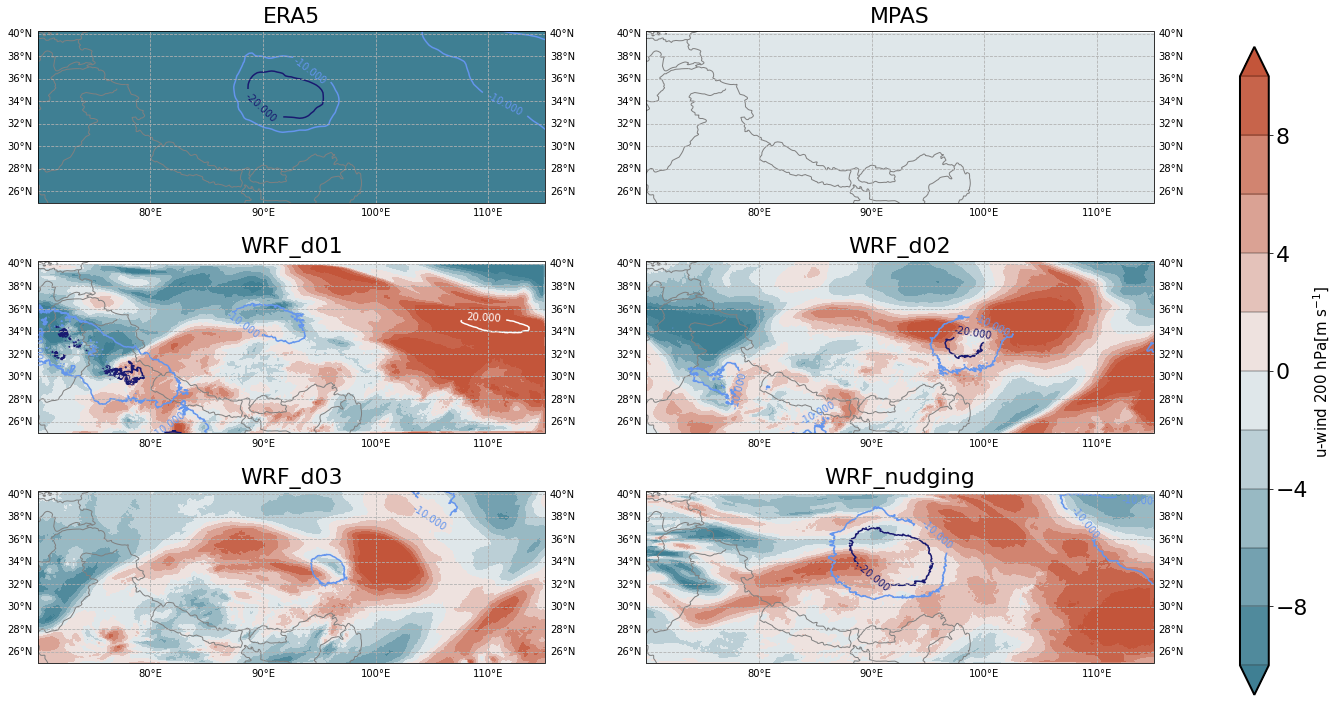

In [141]:
### plot ### 

fig = plt.figure(figsize=(20,12))
cmap = sns.diverging_palette(20, 220, as_cmap=True)
sns.color_palette("Spectral", as_cmap=True)

extent = [70,115,25,38]
fs = 22 

for idx in np.arange(len(jet.keys())):
    key = list(jet.keys())[idx]
    ax = plt.subplot(3, 2, idx+1, projection=ccrs.PlateCarree())
    ax.set_extent(extent)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, color = 'gray')
    m= ax.contourf(lons[key], lats[key], jet[key], levels = np.arange(-10,12,2), extend = 'both', cmap = cmap)
    J = ax.contour(lons[key], lats[key], jet[key], levels = [20], cmap = 'Greys')
    ax.set_title(key, fontsize =fs)
    gl= ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linestyle= '--')
    gl.top_labels = False
    CS=ax.contour(lons[key], lats[key], geop[key], levels = [-20, -10], colors = ['midnightblue', 'cornflowerblue'])
    ax.clabel(CS, CS.levels, inline=True,fontsize=10)
    ax.clabel(J, J.levels, inline=True,fontsize=10)
    
# colorbar for uwind   
cb_ax2 = fig.add_axes([0.96, 0.1,0.02, 0.75])
cbar = fig.colorbar(m, cax=cb_ax2,   drawedges=True)
cbar.outline.set_edgecolor('black')
cbar.outline.set_linewidth(2)
cbar.ax.tick_params(labelsize=fs)
cbar.set_label(r'u-wind 200 hPa[m s$^{-1}$]', size = 15 )

plt.show()

### Difference d01- nudging 

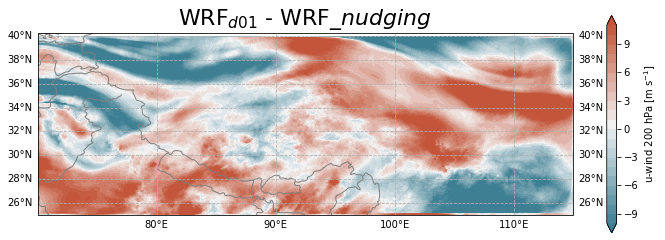

In [78]:
plt.figure(figsize=(12,4))
ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent(extent)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, color = 'gray')

difference = jet['WRF_d01']- jet['WRF_nudging']
m= ax.contourf(lons['WRF_d01'], lats['WRF_d01'], difference, levels = np.arange(-10,12,1), extend = 'both', cmap = cmap)
ax.set_title('WRF$_{d01}$ - WRF_${nudging}$ ', fontsize =fs)
gl= ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linestyle= '--')
gl.top_labels = False

# colorbar for uwind   
plt.colorbar(m, label= 'u-wind 200 hPa [m s$^{-1}$]')
plt.show()

### Eady growth rate 

ERA5, d01 , nudging (maybe d02 and d03)

In [41]:
era = xr.open_dataset('/glade/u/home/kukulies/data/ERA5/ERA5_EGR_19.nc').__xarray_dataarray_variable__
era_egr = np.nanmean(era, axis = 0)

In [62]:
wrf_nudging = xr.open_dataset('/glade/scratch/kukulies/wrf_processed/WRF_nudging_EGR_19.nc').__xarray_dataarray_variable__

wrfd02= xr.open_dataset('/glade/scratch/kukulies/wrf_processed/WRF_EGR_19.nc').__xarray_dataarray_variable__
wrfd02 = np.nanmean(wrfd02, axis = 0)
wrf_nudging = np.nanmean(wrf_nudging, axis = 0)x

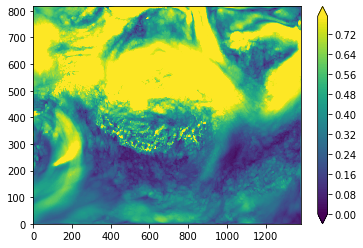

In [63]:
plt.contourf(wrfd02, levels = np.arange(0, 0.8, 0.01), extend = 'both')
plt.colorbar()

In [60]:
wrf_nudging = xr.open_dataset('/glade/scratch/kukulies/wrf_processed/WRF_nudging_EGR_19.nc').__xarray_dataarray_variable__
wrf_nudging = np.nanmean(wrf_nudging, axis = 0)


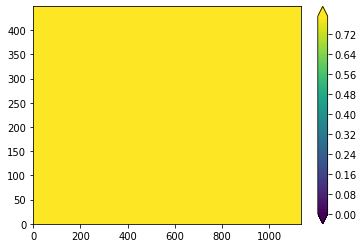

In [61]:
plt.contourf(wrf_nudging, levels = np.arange(0, 0.8, 0.01), extend = 'both')
plt.colorbar()

In [24]:
wrf_nudging.shape

(5, 818, 1382)